<a href="https://colab.research.google.com/github/bryantosin1/PCVK_JOB4/blob/main/PCVKJOB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


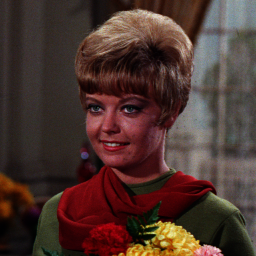

In [16]:
import cv2 as cv
import math
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pylab as plt
import numpy as np
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
cv2_imshow(img)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


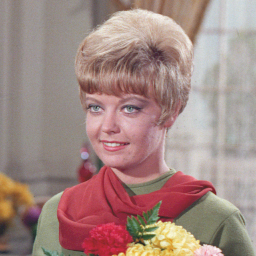

In [94]:
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
ngamma= 1/gamma
gamma_corrected = np.array(255*(img / 255) ** ngamma, dtype = 'uint8')

cv2_imshow(gamma_corrected)


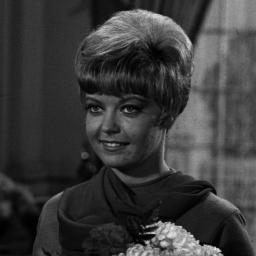

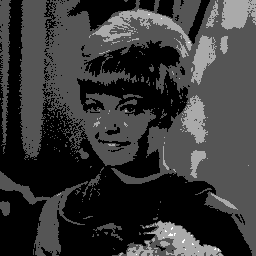

In [15]:
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)
depth_image = np.zeros(original.shape, original.dtype)

for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = round(original[i, j] / level) * level

cv2_imshow(original)
cv2_imshow(depth_image)

In [56]:
import glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCCK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

original_img = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
avg_psnr = 0
avg5_psnr = 0
avg10_psnr = 0
avg20_psnr = 0
avg40_psnr = 0
avg80_psnr = 0

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

for i in range(len(cv_img)):
      current_psnr = psnr(original_img, cv_img[i])
      avg_psnr += current_psnr
avg_psnr /= len(cv_img)

count = 0
for i in range(0, len(cv_img), 5):
    current_psnr = psnr(original_img, cv_img[i])
    avg5_psnr += current_psnr
    count += 1
avg5_psnr /= count

count2 = 0
for i in range(0, len(cv_img), 10):
    current_psnr = psnr(original_img, cv_img[i])
    avg10_psnr += current_psnr
    count2 += 1
avg10_psnr /= count2

count3 = 0
for i in range(0, len(cv_img), 20):
    current_psnr = psnr(original_img, cv_img[i])
    avg20_psnr += current_psnr
    count3 += 1
avg20_psnr /= count3

count4 = 0
for i in range(0, len(cv_img), 40):
    current_psnr = psnr(original_img, cv_img[i])
    avg40_psnr += current_psnr
    count4 += 1
avg40_psnr /= count4

count5 = 0
for i in range(0, len(cv_img), 80):
    current_psnr = psnr(original_img, cv_img[i])
    avg80_psnr += current_psnr
    count5 += 1
avg80_psnr /= count5

print("Jumlah Semua Average PSNR: ", avg_psnr)
print("Jumlah 5 Gambar Average PSNR: ", avg5_psnr)
print("Jumlah 10 GambarAverage PSNR: ", avg10_psnr)
print("Jumlah 20 Gambar Average PSNR: ", avg20_psnr)
print("Jumlah 40 Gambar Average PSNR: ", avg40_psnr)
print("Jumlah 80 Gambar Average PSNR: ", avg80_psnr)

Jumlah Semua Average PSNR:  27.88566727970215
Jumlah 5 Gambar Average PSNR:  27.883564145581072
Jumlah 10 GambarAverage PSNR:  27.883204334734653
Jumlah 20 Gambar Average PSNR:  27.88529836907162
Jumlah 40 Gambar Average PSNR:  27.885150955994778
Jumlah 80 Gambar Average PSNR:  27.887321126097195


Nilai PSNR dengan 5 citra :  19.530597950056563  dB


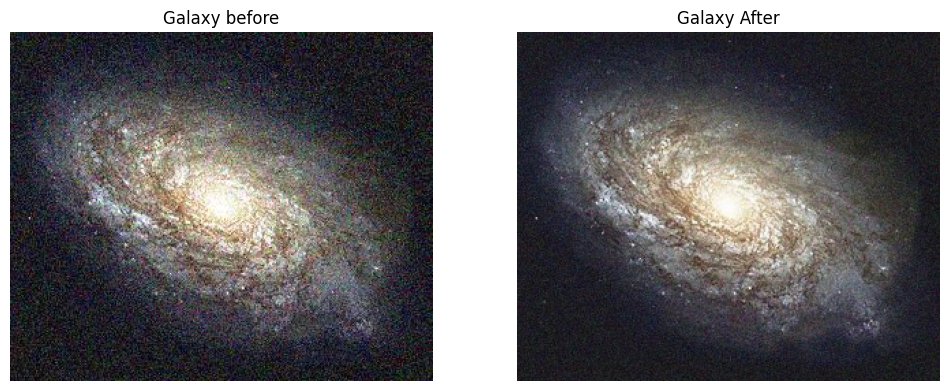

In [57]:
import glob
import cv2
from math import sqrt, log10

def PSNR(img1, img2):
  mse = np.mean((img1-img2)**2)
  if(mse==0):
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

# membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 5
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR dengan 5 citra : ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

Nilai PSNR dengan 10 citra :  19.73544580626858  dB


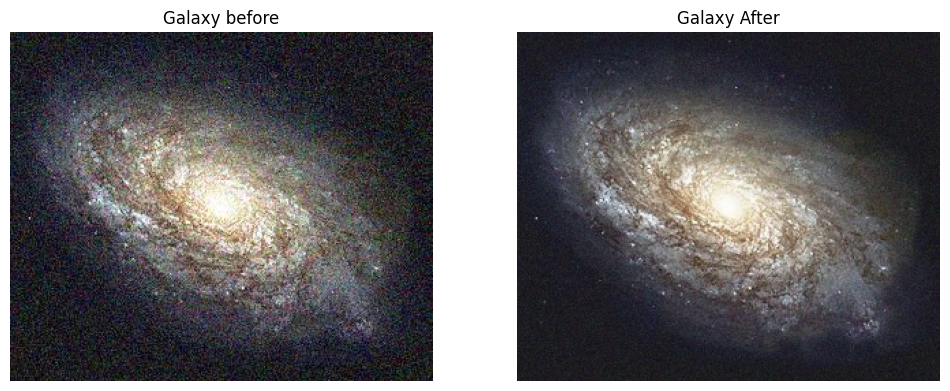

In [58]:
# membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 10
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR dengan 10 citra : ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

Nilai PSNR dengan 20 citra :  19.84015626033707  dB


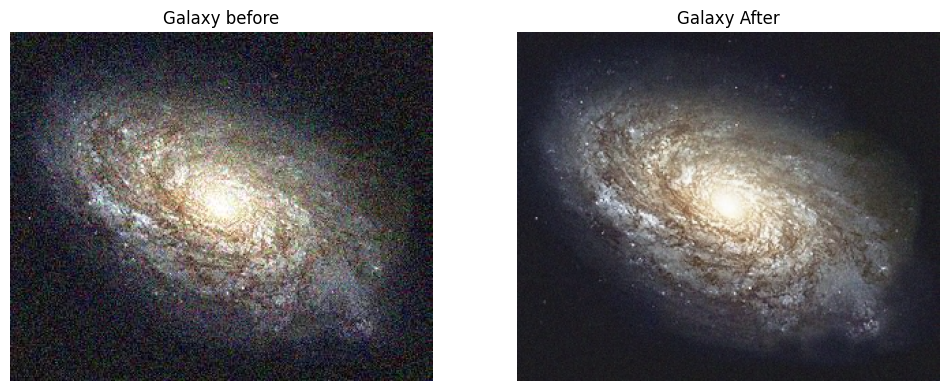

In [59]:
# membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 20
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR dengan 20 citra : ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

Nilai PSNR dengan 40 citra :  19.892747771134445  dB


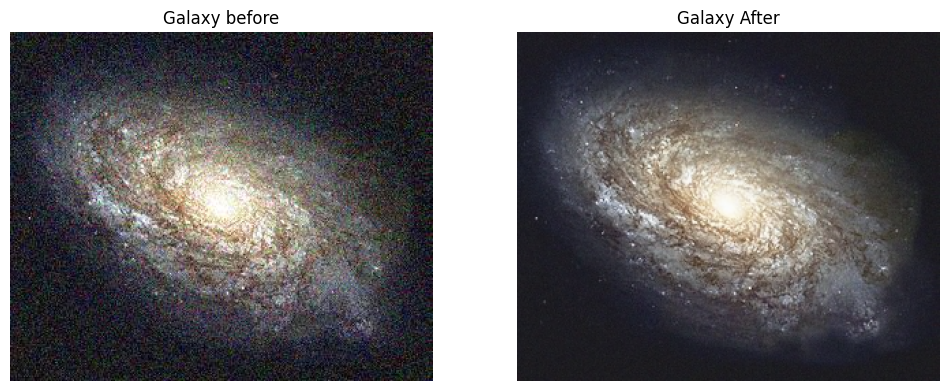

In [60]:
# membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 40
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)
print('Nilai PSNR dengan 40 citra : ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

Nilai PSNR dengan 80 citra :  19.91557909885071  dB


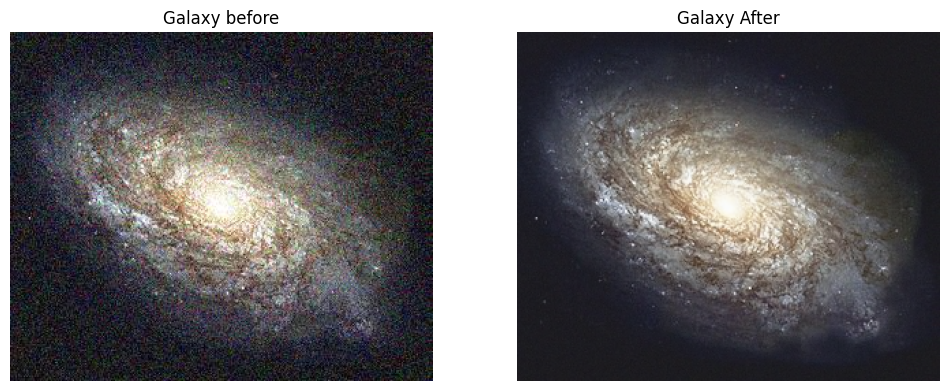

In [61]:
# membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 80
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR dengan 80 citra : ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

Nilai PSNR dengan 80 citra :  19.92128950094575  dB


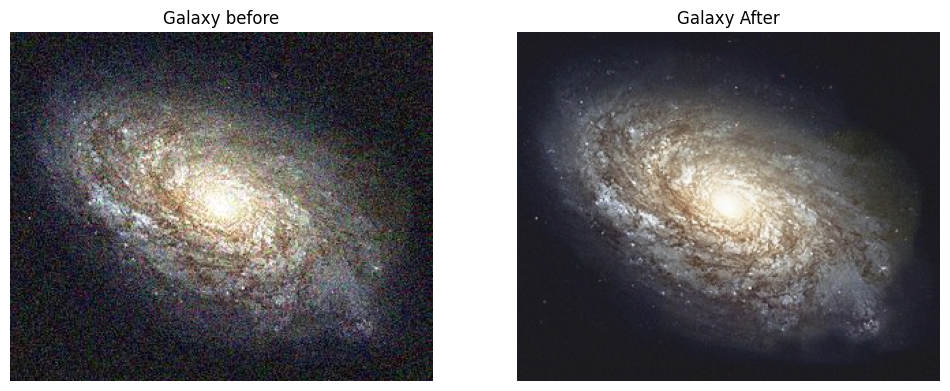

In [62]:
# membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 100
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR dengan 80 citra : ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

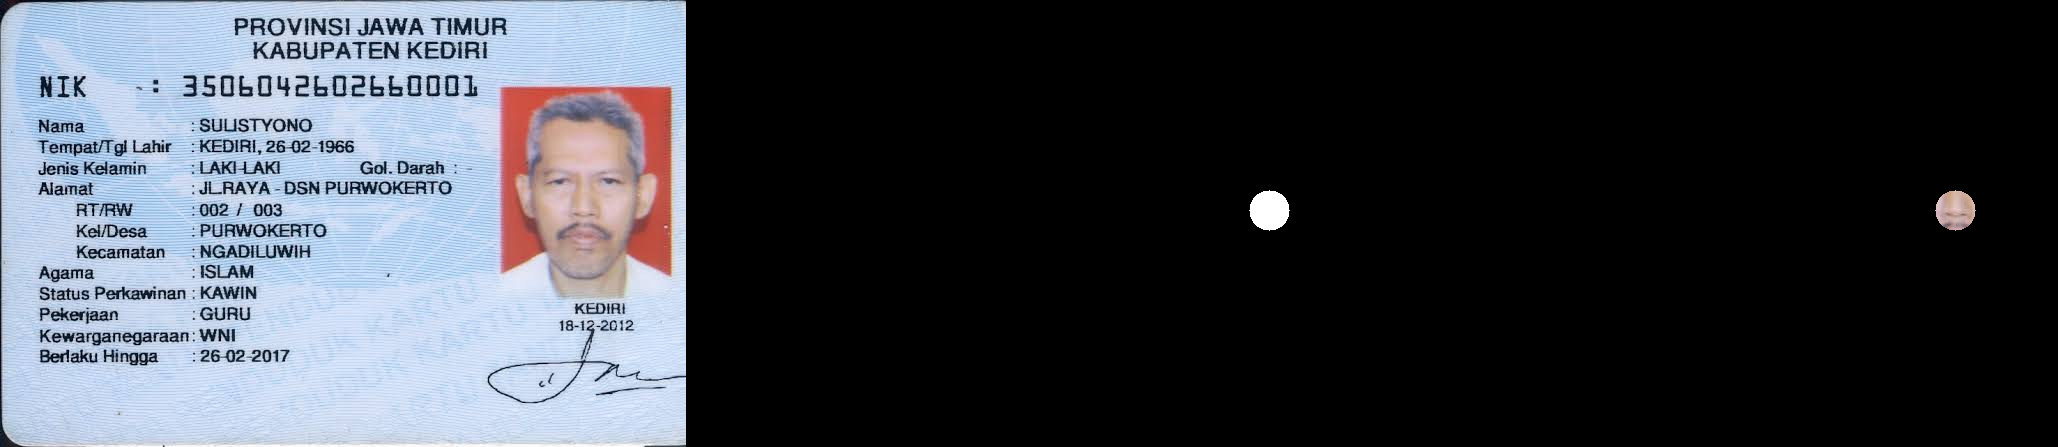

In [87]:
# menggunakan operator and
img = cv.imread('/content/drive/MyDrive/PCVK/KTP.jpeg')
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (583,210), 20, (255,255,255), -1)

result = img & mask
masked = cv.bitwise_and(img,mask)

final_frame = cv.hconcat((img,mask,masked))
cv2_imshow(final_frame)

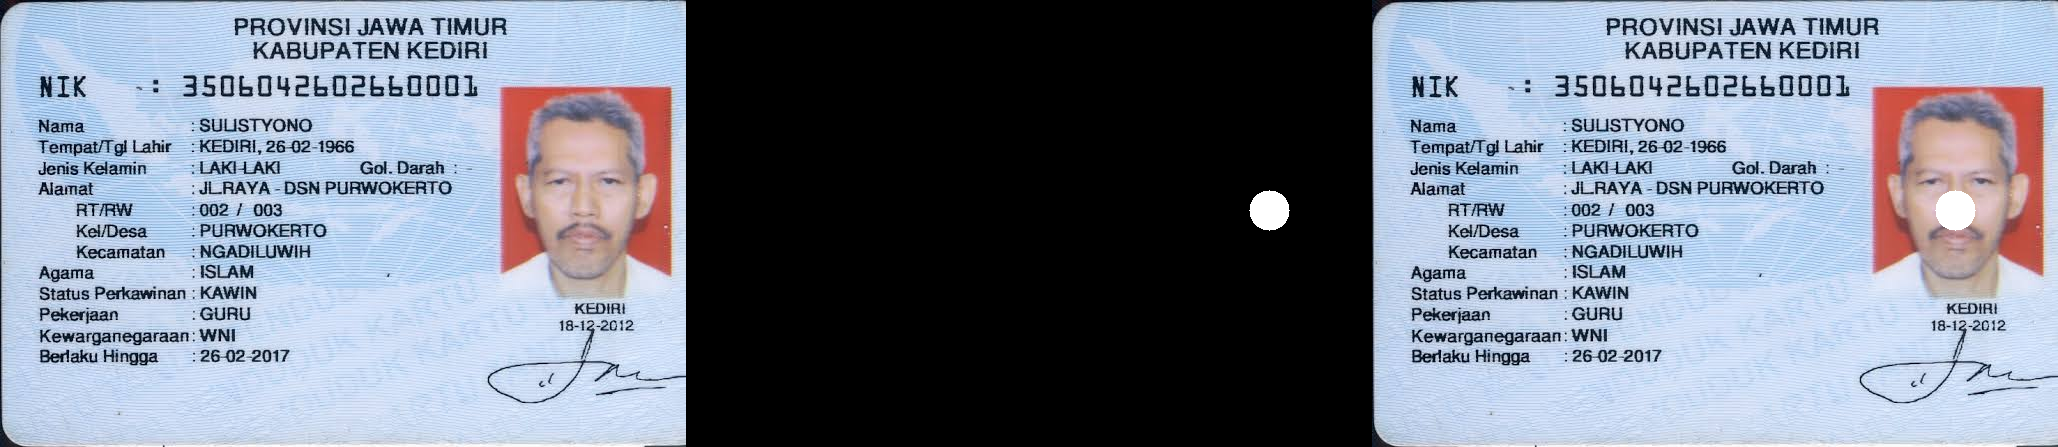

In [88]:
# menggunakan operator or

mask = np.zeros(img.shape,img.dtype)
mask = cv.circle(mask, (583,210), 20, (255,255,255), -1)

result = img & mask

masked = cv.bitwise_or(img,mask)

final_frame = cv.hconcat((img,mask,masked))
cv2_imshow(final_frame)

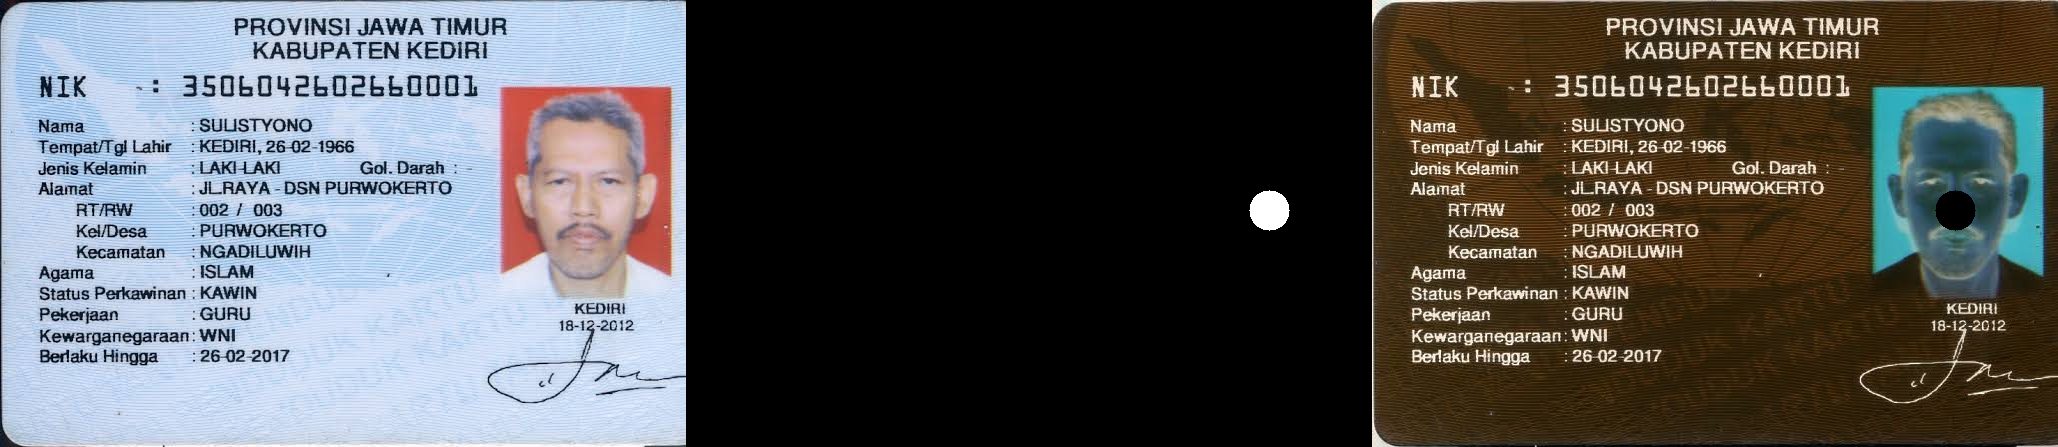

In [78]:
# menggunakan operator or

mask = np.zeros(img.shape,img.dtype)
mask = cv.circle(mask, (583,210), 20, (255,255,255), -1)

result = img & mask

masked = ~img & ~mask

final_frame = cv.hconcat((img,mask,masked))
cv2_imshow(final_frame)

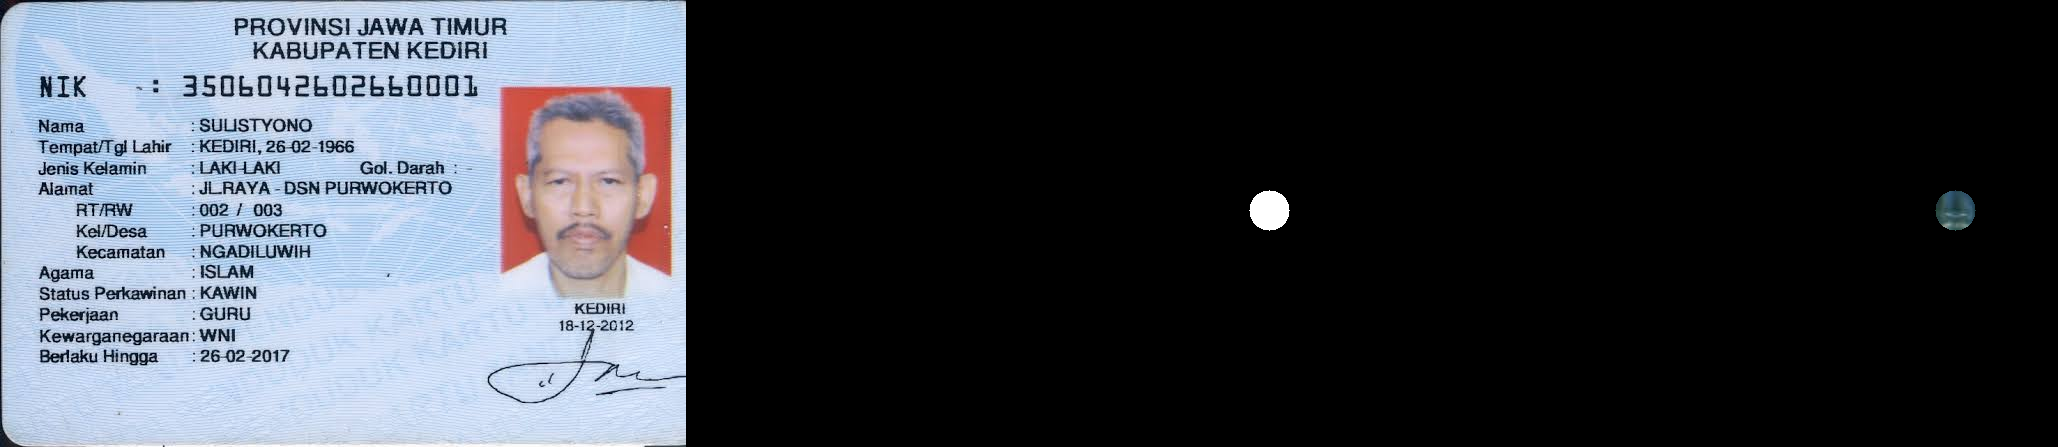

In [84]:
# menggunakan operator or

mask = np.zeros(img.shape,img.dtype)
mask = cv.circle(mask, (583,210), 20, (255,255,255), -1)

result = img & mask

masked = ~img & mask

final_frame = cv.hconcat((img,mask,masked))
cv2_imshow(final_frame)

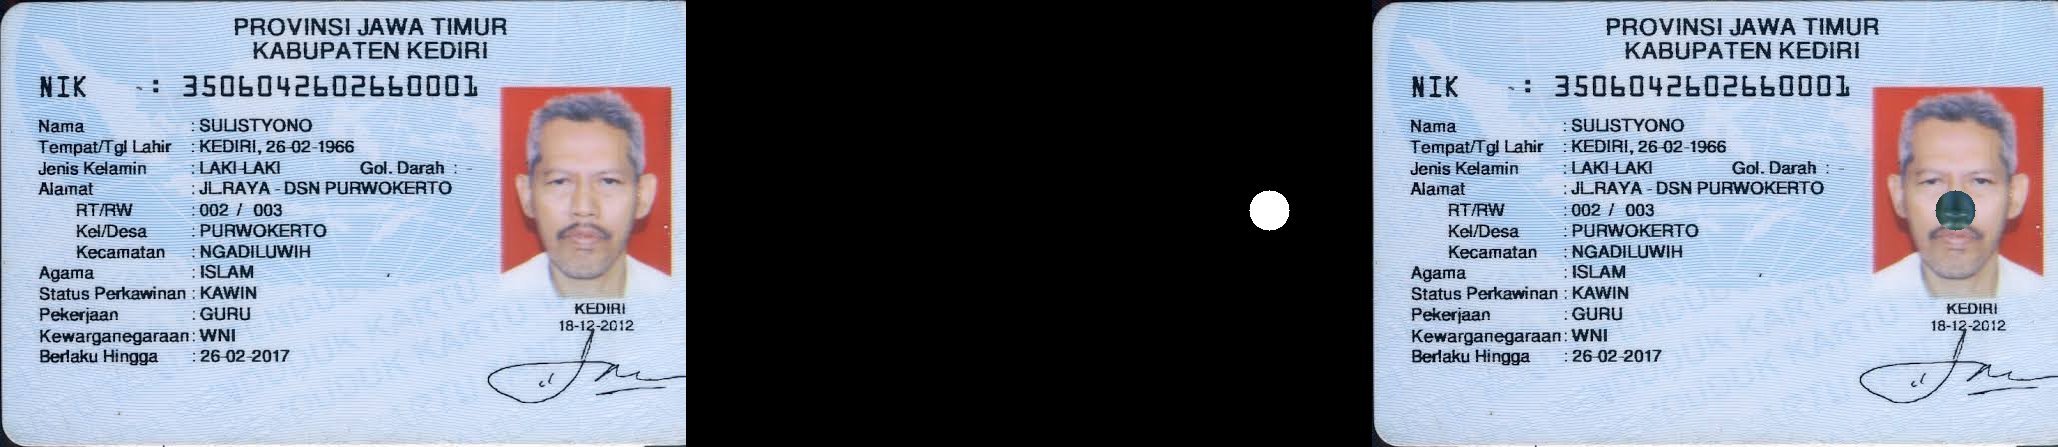

In [80]:
# menggunakan operator or

mask = np.zeros(img.shape,img.dtype)
mask = cv.circle(mask, (583,210), 20, (255,255,255), -1)

result = img & mask

masked = cv.bitwise_xor(img,mask)

final_frame = cv.hconcat((img,mask,masked))
cv2_imshow(final_frame)